<a href="https://colab.research.google.com/github/E-wave112/ml-dl/blob/master/cvvcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#computer vision with artificial neural networks via the mnist dataset

import keras
import pandas as pd
import numpy as np
from pandas import DataFrame
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential
data =  mnist.load_data()
import matplotlib.pyplot as plt
print(type(data))
df = pd.read_csv('/content/drive/My Drive/trainfolder/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/testfolder/test2.csv')

X_train = df.drop(labels = ["label"], axis = 1)
y_train = df['label']

X_test = df2

y_train = np.array(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train/255
X_test  = X_test/255

y_train = to_categorical(y_train)
#print(y_train[2])
print(X_train.shape, X_test.shape)



image_size = 784 # 28*28 + 1
num_classes = 10 # ten unique digits


model = Sequential()

model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
model.save('ann_model.hdf5')
pred = np.argmax(model.predict(X_test), axis=-1)

#visualizations to note the learning curve of our model
model accuracy
plt.title('model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Test'],loc='upper left')
plt.show()


#model loss
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'],loc='upper left')
plt.show()

pred = pd.DataFrame({'ImageId':[i for i in range(1,28001)],"label":pred})
pred.to_csv('/content/drive/My Drive/testfolder/sumbissions2.csv',index=False)
print(pred)


'''
model.save('ann_model.hdf5')
predictions = model.predict_classes(X_test)
submission.Label = predictions
submission.to_csv(('/content/drive/My Drive/testfolder/sumbisions.csv'), index=False)
'''

#model generated a 76 percent accurracy using an sgd and a 92 per cent with adam


<class 'tuple'>
(784,)
(42000, 784) (28000, 784)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
       ImageId  label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


"\nmodel.save('ann_model.hdf5')\npredictions = model.predict_classes(X_test)\nsubmission.Label = predictions\nsubmission.to_csv(('/content/drive/My Drive/testfolder/sumbisions.csv'), index=False)\n"

In [ ]:
#computer vision with convolutional neural networks via the mnist dataset

#importing tools
import keras
import numpy as np
import pandas as pd
from pandas import DataFrame
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten # Dense layers are "fully connected" layers
from keras.models import Sequential
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/My Drive/trainfolder/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/testfolder/test2.csv')

X_train = df.drop("label",axis = 1)
y_train = df['label']
X_test = df2




X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)


X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = to_categorical(y_train,10)
print(y_train[:10])

##build sequential model
model = Sequential()

##add conv model
model.add(Conv2D(50,kernel_size=(3,3),strides =(1,1),padding='valid',activation='relu',input_shape = (28,28,1)))
##pooling layer
model.add(MaxPool2D(pool_size=(1,1)))

##flatten the conv network
model.add(Flatten())

##hidden
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['Accuracy'])
#model.summary()

history = model.fit(X_train, y_train,batch_size=128,epochs=10,verbose=False,validation_split=0.1)

##learning curve for model accuracy
plt.title('Model loss')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc ='upper right')
plt.show()


##learning curve for model loss
plt.title('Model loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'],loc ='upper right')
plt.show()

pred = np.argmax(model.predict(X_test),axis=-1)

predictions = pd.DataFrame({'ImageId':[i for i in range(1,28001)],"label":pred})
predictions.to_csv('/content/drive/My Drive/testfolder/sumbissionscnn2.csv',index=False)


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


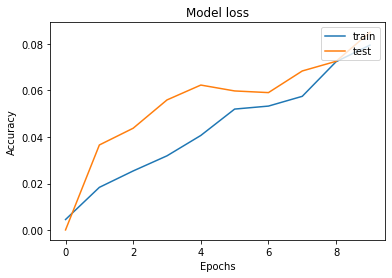

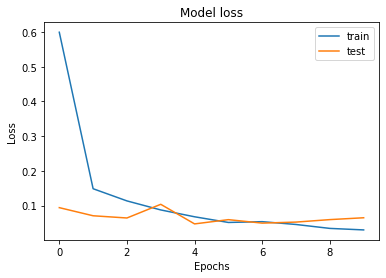

       ImageId  label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [ ]:
##improving the cnn model with hyperparameter tuning
import keras
import numpy as np
import pandas as pd
from pandas import DataFrame
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten # Dense layers are "fully connected" layers
from keras.models import Sequential
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/My Drive/trainfolder/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/testfolder/test2.csv')

X_train = df.drop("label",axis = 1)
y_train = df['label']
X_test = df2




X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)


X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

y_train = to_categorical(y_train,10)
print(y_train[:10])

##build sequential model
model = Sequential()

##add conv model
model.add(Conv2D(50,kernel_size=(3,3),strides =(1,1),padding='valid',activation='relu',input_shape = (28,28,1)))

##pooling layer
model.add(MaxPool2D(pool_size=(1,1)))

#added conv
model.add(Conv2D(filters = 100, kernel_size= (5, 5), activation='relu'))
#added pool
model.add(MaxPool2D(pool_size=(1,1)))

##flatten the conv network
model.add(Flatten())

##hidden
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(192, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['Accuracy'])
#model.summary()

history = model.fit(X_train, y_train,batch_size=128,epochs=10,verbose=False,validation_split=0.1)

##learning curve for model accuracy
plt.title('Model loss')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc ='upper right')
plt.show()


##learning curve for model loss
plt.title('Model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'],loc ='upper right')
plt.show()

pred = np.argmax(model.predict(X_test),axis=-1)

predictions = pd.DataFrame({'ImageId':[i for i in range(1,28001)],"label":pred})
predictions.to_csv('/content/drive/My Drive/testfolder/sumbissionscnn.csv')
print(predictions)